## **PROJECT 05**
## **Association Rules Analysis - Market Basket Data**

### **Installing and importing required libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

### **Loading and exploring the dataset**

In [ ]:
df = pd.read_csv('MiniLab_synthetic_transactions_week13.csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 transactions:")
print(df.head())
print("\nData types:")
print(df.dtypes)

Dataset shape: (15, 8)

First 5 transactions:
   apple  banana   milk  bread   eggs  butter  juice  cheese
0  False    True  False  False   True    True   True   False
1  False    True   True  False  False   False   True   False
2   True   False   True  False   True   False  False   False
3   True   False  False   True   True   False  False   False
4   True    True   True  False  False   False  False   False

Data types:
apple     bool
banana    bool
milk      bool
bread     bool
eggs      bool
butter    bool
juice     bool
cheese    bool
dtype: object


### **Finding frequent itemsets using Apriori algorithm**


In [ ]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets (support ≥ 0.3):")
print(frequent_itemsets.sort_values('support', ascending=False))

Frequent Itemsets (support ≥ 0.3):
     support          itemsets
0   0.600000          (banana)
1   0.600000            (milk)
3   0.533333            (eggs)
4   0.533333          (butter)
5   0.533333           (juice)
7   0.400000    (banana, milk)
2   0.333333           (bread)
6   0.333333          (cheese)
8   0.333333    (banana, eggs)
9   0.333333  (banana, butter)
10  0.333333    (milk, butter)
11  0.333333   (butter, juice)


### **Generating association rules**

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Association Rules (confidence ≥ 0.6):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('confidence', ascending=False))

Association Rules (confidence ≥ 0.6):
  antecedents consequents   support  confidence      lift
0    (banana)      (milk)  0.400000    0.666667  1.111111
1      (milk)    (banana)  0.400000    0.666667  1.111111
2      (eggs)    (banana)  0.333333    0.625000  1.041667
3    (butter)    (banana)  0.333333    0.625000  1.041667
4    (butter)      (milk)  0.333333    0.625000  1.041667
5    (butter)     (juice)  0.333333    0.625000  1.171875
6     (juice)    (butter)  0.333333    0.625000  1.171875


### **Interpreting one rule for marketing implications**

In [ ]:
print("Top 3 Distinct Association Rules Analysis:\n")

if len(rules) > 0:
    rules['antecedents_set'] = rules['antecedents'].apply(lambda x: frozenset(x))
    rules['consequents_set'] = rules['consequents'].apply(lambda x: frozenset(x))
    rules['rule_pair'] = rules.apply(lambda x: frozenset([x['antecedents_set'], x['consequents_set']]), axis=1)

    distinct_rules = rules.drop_duplicates(subset=['rule_pair']).sort_values('confidence', ascending=False).head(3)

    for i, (index, rule) in enumerate(distinct_rules.iterrows(), 1):
        print(f"Rule {i}:")
        print(f"  When customers buy {set(rule['antecedents'])}, they also buy {set(rule['consequents'])}")
        print(f"  Confidence: {rule['confidence']:.2%}")
        print(f"  Support: {rule['support']:.2%}")
        print(f"  Lift: {rule['lift']:.2f}")

        if rule['lift'] > 1:
            print("  Marketing Implication: Strong positive association - ideal for cross-promotion")
        else:
            print("  Marketing Implication: Items are frequently purchased together")
        print()

else:
    print("No rules found with the current thresholds. Try lowering min_confidence or min_support.")

Top 3 Distinct Association Rules Analysis:

Rule 1:
  When customers buy {'banana'}, they also buy {'milk'}
  Confidence: 66.67%
  Support: 40.00%
  Lift: 1.11
  Marketing Implication: Strong positive association - ideal for cross-promotion

Rule 2:
  When customers buy {'eggs'}, they also buy {'banana'}
  Confidence: 62.50%
  Support: 33.33%
  Lift: 1.04
  Marketing Implication: Strong positive association - ideal for cross-promotion

Rule 3:
  When customers buy {'butter'}, they also buy {'banana'}
  Confidence: 62.50%
  Support: 33.33%
  Lift: 1.04
  Marketing Implication: Strong positive association - ideal for cross-promotion



### **Creating scatterplot of support vs confidence**

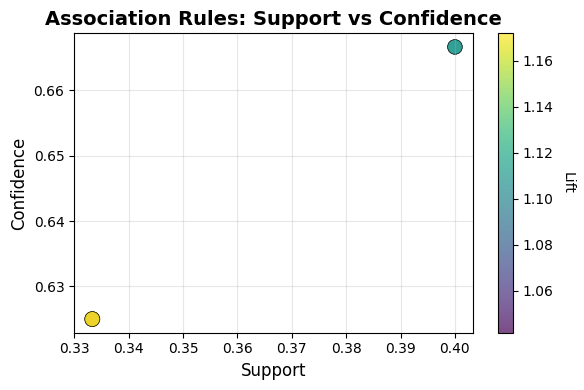

In [ ]:
plt.figure(figsize=(6, 4))

if len(rules) > 0:
    scatter = plt.scatter(rules['support'], rules['confidence'],
                         c=rules['lift'],
                         s=rules['lift']*100,
                         cmap='viridis',
                         alpha=0.7,
                         edgecolors='black',
                         linewidth=0.5)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Lift', rotation=270, labelpad=15)

    plt.title('Association Rules: Support vs Confidence', fontsize=14, fontweight='bold')
    plt.xlabel('Support', fontsize=12)
    plt.ylabel('Confidence', fontsize=12)

    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("No rules to visualize. Adjust parameters to generate rules.")

### **ASSIGNMENT QUESTIONS**

### **1. Which items are frequently purchased together?**

In [ ]:
# Screening the most frequent 2-item combinations
frequent_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)]
if len(frequent_pairs) > 0:
    print("Most frequent item pairs:")
    for _, row in frequent_pairs.nlargest(3, 'support').iterrows():
        items = list(row['itemsets'])
        print(f"   {items[0]} + {items[1]} (support: {row['support']:.2%})")
else:
    print("No frequent item pairs found.")

Most frequent item pairs:
   banana + milk (support: 40.00%)
   banana + eggs (support: 33.33%)
   banana + butter (support: 33.33%)


#### **COMMENTS:** *Based on the analysis, I see that bananas and milk are most frequently purchased together with 40% support. Bananas are also commonly paired  with eggs and butter, each at 33.33% support. Thus, I can infer that in about 4 out of 10 transactions, customers buy both bananas and milk. I see that these patterns reveal natural shopping behaviors where customers tend to select these items in combination. The high frequency of bananas appearing in pairs indicates to me that this product may serve as an anchor item in shopping baskets, probably related to preparation of recipies or just usual eating behavior.*

### **2. What marketing strategies could be applied based on the discovered rules?**

#### **COMMENTS:** *From my perspective, since customers who buy bananas often purchase milk (66.67% confidence), I think that creating bundle promotions like "buy bananas get milk discount" would probably leverage this relationship. I also think that placing eggs and bananas in closer proximity could increase sales of both items. Not less importantly, the strong association between butter and juice indicates potential for joint promotional events. That is, retailers could develop, for example, targeted digital coupons that are activated when customers purchase one item, offering discounts on its commonly paired partner. I believe these strategies would capitalize on existing customer behaviors rather than trying to create new purchasing patterns, which tends to make the marketing efforts more efficient and effective.*

### **3. How would you use these insights to improve product placement or promotions?**

#### **COMMENTS:** *I think that the easiest and most obvious strategy would be to position frequently paired items closer together. For example, placing banana displays near the dairy section to  accommodate the strong banana-milk purchasing pattern. However, I also think that strategic separation can also work to increase store traffic. That is, promotions could include point-of-purchase displays featuring banana-milk smoothie recipes between these sections. Another option is end-cap displays featuring themed bundles like "breakfast combos" with bananas, milk and eggs. For digital promotions strategy, I think that the store app (if there is any) could send personalized notifications to customers about complementary items when they add one product to their cart, and I believe that it creates opportunities for increased basket size through the data-driven suggestions.*